In [14]:
import numpy as np
import matplotlib.pyplot as plt
#import rc_tools as rct
#import rc_matrices as rcm
#import rc_analysis as rca
import sys
import os

from scipy.signal import argrelmax
import pdb

import scipy
import matplotlib.gridspec as gridspec

from jupyterthemes import jtplot
jtplot.style(theme='solarizedd', context='notebook', ticks=True, grid=False)

fontsize = 24
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["text.usetex"] = True 
plt.rcParams["axes.xmargin"] = 0 
plt.rcParams["axes.titlesize"] = 26 
plt.rcParams["axes.labelsize"] = 26 
plt.rcParams["xtick.labelsize"] = fontsize 
plt.rcParams["ytick.labelsize"] = fontsize
plt.rcParams["xtick.color"] = 'black'
plt.rcParams["ytick.color"] = 'black'
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"  #lmodern

NameError: name 'r' is not defined

In [15]:
def Rxy(x,y):
    return np.dot(x.T,y)/(np.linalg.norm(x)*np.linalg.norm(y))

In [33]:
# Get target and predictions
SIGNUM = 0
target_dir = '../Targets'
target_signals = ['Xsignal.npy',
                  'Zsignal.npy',
                  'MGsignal.npy',
                  'L3Dsignal.npy']
fpath = os.path.join(target_dir,target_signals[SIGNUM])
target = np.load(fpath, allow_pickle=True)
print(f'Target {target_signals[SIGNUM]} shape is {target.shape}')

model_dir = ['../X_Saved_Models',
             '../Z_Saved_Models',
             '../MG_Saved_Models',
             '../L3D_Saved_Models']
preds_dir = 'best/Preds'
pred_str  = 'X_it71_50_0_0_Preds.npy'
fpath = os.path.join(model_dir[SIGNUM],preds_dir,pred_str)
signal = np.squeeze(np.load(fpath, allow_pickle=True))
print(f'Signal shape is {signal.shape}')

Target Xsignal.npy shape is (16000,)
Signal shape is (16000,)


k-size=30 Trainingset min=0.97812 threshold=0.92921  Location=150


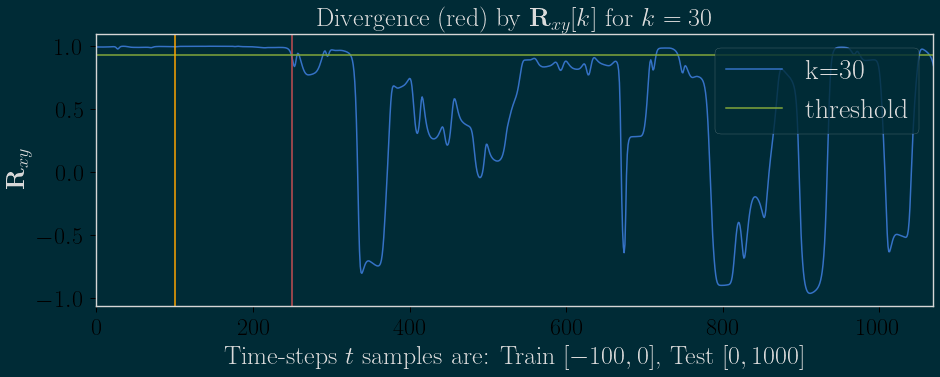

In [34]:
k_list = [30]
start, stop = 13000, 15000  #Depends on dataset
# X,Z,L3D run from 13000 to 15000
# MG 19000 to 20000
plt.figure(figsize=(15,5))
for k in k_list:
    trainCorr = np.zeros((stop-start)-k)
    for j in range(start, stop-k):
        tar = target[j:j+k].reshape((k,1))
        prd = signal[j:j+k].reshape((k,1))
        trainCorr[j-start] = Rxy(tar,prd)
    minVal = trainCorr[:1000].min()
    threshold = minVal*.95
    thresholdLoc = np.where(trainCorr[1000:2000]<threshold)[0][0]
    print(f'k-size={k} Trainingset min={trainCorr[:1000].min().round(5)}',
          f'threshold={threshold:.5f}',
          f' Location={thresholdLoc}')
    plt.plot(trainCorr[900:2000], label=f'k={k}')
    plt.axvline(100+thresholdLoc,color='r')
plt.axhline(threshold,color='g', label='threshold')
plt.ylabel('$\mathbf{R}_{xy}$')
plt.xlabel('Time-steps $t$ samples are: Train $[-100,0]$, Test $[0,1000]$')
plt.legend(loc='upper right', fontsize=28)
plt.axvline(100,color='orange') #End trainset
plt.title('Divergence (red) by $\mathbf{R}_{xy}[k]$ for $k=30$')
plt.show()